## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import seaborn as sns
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
mergeData= pd.merge(left=mouse_metadata, right=study_results)
mergeData


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.


In [4]:
mergeData.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [5]:
mergeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data= mergeData.drop_duplicates(subset= ['Mouse ID','Timepoint'], keep= False).reset_index()





In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
 #Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1878,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1879,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1880,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1881,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].count()

1883

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouseIdMean= clean_data.groupby('Mouse ID').mean()['Tumor Volume (mm3)'] 
mouseIdMean
mouseIdMedian= clean_data.groupby('Mouse ID').median()['Tumor Volume (mm3)'] 
mouseIdMedian
mouseIdVariance= clean_data.groupby('Mouse ID').var()['Tumor Volume (mm3)']
mouseIdVariance
mouseIdSTD=clean_data.groupby('Mouse ID').std()['Tumor Volume (mm3)']
mouseIdSTD
mouseIdSEM=clean_data.groupby('Mouse ID').sem()['Tumor Volume (mm3)']
mouseIdSEM

summaryStats = {'mean':mouseIdMean, 
        'Median': mouseIdMedian,
        'Variance': mouseIdVariance,
        'Standard Deviation': mouseIdSTD,
        'SEM':mouseIdSEM} 

summaryStats_df = pd.DataFrame(summaryStats) 
summaryStats_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,mean,Median,Variance,Standard Deviation,SEM
Mouse ID,,,,,
a203,56.312708,55.983272,50.407041,7.099792,2.245151
a251,55.237095,55.938620,51.740730,7.193103,2.274659
a262,58.611631,58.572588,84.759928,9.206515,2.911356
a275,52.770965,52.044750,36.322924,6.026850,1.905857
a366,54.639906,55.265582,38.415384,6.198015,2.342629
...,...,...,...,...,...
z435,46.942214,47.115980,3.464898,1.861424,1.074693
z578,38.411510,38.160380,17.969628,4.239060,1.340508
z581,53.979584,53.062175,29.827123,5.461421,1.727053


## Bar Plots

In [11]:
clean_data

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1878,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1879,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1880,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1881,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
mouseTimepoint= clean_data.groupby('Timepoint').count()['Mouse ID'].reset_index()
mouseTimepoint

,Timepoint,Mouse ID
0,0,248
1,5,236
2,10,221
3,15,205
4,20,193
5,25,183
6,30,171
7,35,154
8,40,142
9,45,130


Text(0, 0.5, 'Mouse ID')

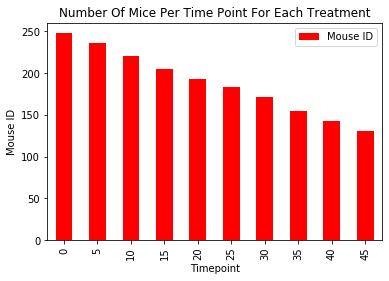

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
pandasbar=mouseTimepoint.plot(kind='bar',x='Timepoint',y='Mouse ID', color='red', title= 'Number Of Mice Per Time Point For Each Treatment')
pandasbar.set_ylabel('Mouse ID')

Text(0, 0.5, 'Number of Mice')

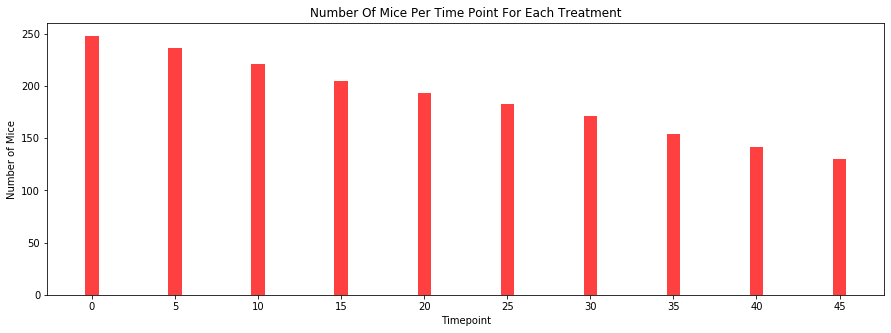

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mouseTimepoint))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,5))
plt.bar(mouseTimepoint["Timepoint"], mouseTimepoint["Mouse ID"], color='r', alpha=0.75, align="center")
plt.xticks((0, 5, 10, 15,20,25,30,35,40,45))
plt.title("Number Of Mice Per Time Point For Each Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")

## Pie Plots

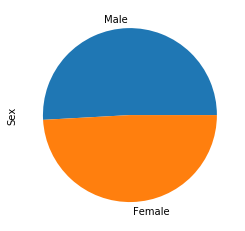

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_data.head()
#clean_data.groupby('Sex').count()
maleVFemale= clean_data.Sex.value_counts()
maleVFemale.plot(kind= 'pie')



In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

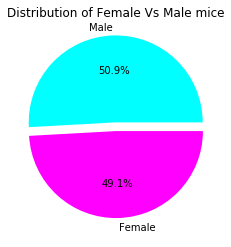

In [17]:
colors=['cyan','magenta']
explode= [0.1, 0]
label= ['Male', 'Female']
title= ['Gender ratio of rats']
plt.pie(maleVFemale, explode=explode, labels= label, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.title('Distribution of Female Vs Male mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
drugs= clean_data.groupby('Drug Regimen').min()
drugs
drugs['Tumor Volume (mm3)'].sort_values()

Drug Regimen
Ramicane     22.050126
Capomulin    23.343598
Infubinol    36.321346
Ceftamin     45.000000
Ketapril     45.000000
Naftisol     45.000000
Placebo      45.000000
Propriva     45.000000
Stelasyn     45.000000
Zoniferol    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [19]:
#clean_data.groupby(['Drug Regimen','Mouse ID']).min()['Tumor Volume (mm3)'].reset_index()
topdrugs= clean_data.loc[(clean_data['Drug Regimen'] == 'Ramicane')|(clean_data['Drug Regimen'] == 'Capomulin')|(clean_data['Drug Regimen'] == 'Infubinol')
                  |(clean_data['Drug Regimen'] == 'Ceftamin')]
finalTvolume= topdrugs.groupby(['Drug Regimen','Mouse ID']).min()['Tumor Volume (mm3)'].reset_index()
finalTvolume

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,37.967644
1,Capomulin,b742,37.950355
2,Capomulin,f966,30.485985
3,Capomulin,g288,36.356851
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [20]:
quartiles = finalTvolume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor volume is: {lowerq}")
print(f"The upper quartile of Tumor volume is: {upperq}")
print(f"The interquartile range of Tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor volume is: 36.3479748575
The upper quartile of Tumor volume is: 45.0
The interquartile range of Tumor volume is: 8.652025142500001
The the median of tumor volume is: 44.59172546 
Values below 23.369937143749997 could be outliers.
Values above 57.97803771375 could be outliers.


In [21]:
outliers = finalTvolume.loc[(finalTvolume['Tumor Volume (mm3)'] < 23.37)|(finalTvolume['Tumor Volume (mm3)'] > 57.97)]
outliers

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
16,Capomulin,s185,23.343598
88,Ramicane,k403,22.050126


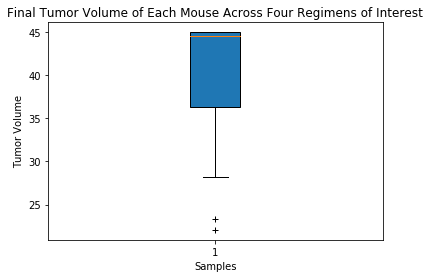

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.title("Final Tumor Volume of Each Mouse Across Four Regimens of Interest")
plt.boxplot(finalTvolume['Tumor Volume (mm3)'],patch_artist= True, sym='+')
plt.ylabel('Tumor Volume')
plt.xlabel('Samples')
plt.show()

## Line and Scatter Plots

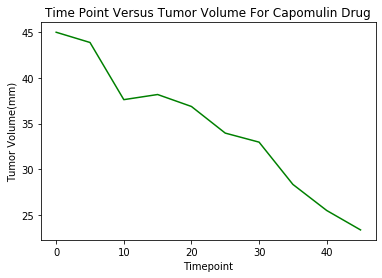

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df= clean_data.loc[clean_data['Drug Regimen']== 'Capomulin']
capomulinMouse_df= capomulin_df.loc[capomulin_df['Mouse ID']== 's185']
x_axis= capomulinMouse_df.Timepoint
#capomulinMouse_df
mouse_1, = plt.plot(x_axis,capomulinMouse_df['Tumor Volume (mm3)'], 
                       color="green",label='capomulin')
plt.title("Time Point Versus Tumor Volume For Capomulin Drug")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm)")

plt.show()

In [24]:
capomulinMean_vol= capomulin_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
capomulinMean_vol= capomulinMean_vol.reset_index()


In [25]:
capomulin_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
capomulin_weight= capomulin_weight.reset_index()
capomulin_weight

,Mouse ID,Weight (g)
0,b128,22
1,b742,21
2,f966,17
3,g288,19
4,g316,22
5,i557,24
6,i738,20
7,j119,23
8,j246,21
9,l509,21


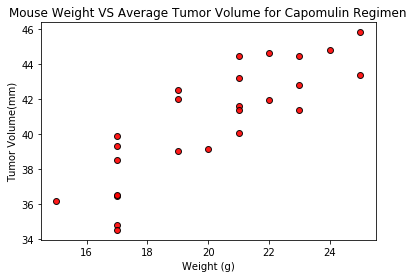

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df

x_axis = capomulin_weight['Weight (g)']
y_axis = capomulinMean_vol['Tumor Volume (mm3)']
plt.scatter( x_axis,y_axis,  marker="o", facecolors="red", edgecolors="black",
             alpha=0.9)
plt.title('Mouse Weight VS Average Tumor Volume for Capomulin Regimen')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume(mm)")

plt.show()


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
correlation


(0.8419363424694717, 1.322572243471279e-07)

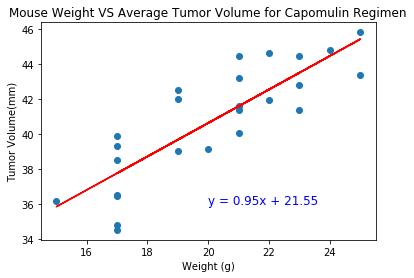

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=12,color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume(mm)")
plt.title('Mouse Weight VS Average Tumor Volume for Capomulin Regimen')
plt.show()

In [29]:
#Observations:
#1
# From the regression line of Mouse weight vs average tumor volume for Capomulin, I realised that there 
# was a direct strong correlation(as given by the correlation coeffient of 0.84) betweet weight and Tumor volume. 
# Heavier mice tended to develop larger tumors.

#2
# Number of mice per time point for each treatment throughout the course of the study reduced over time based on the barcharts.
# This means that some treatments caused the mice to die even though at first these medicines were curing the tumors.

#3
# The initial dataset had 10 duplicates that could have affected the outcome of the data. This meant that the dataset had
# to be cleaned and the duplicates dumped. From this I realised the importance of data-cleaning when analysing data.